In [1]:
import json

In [2]:
def short_name(name):
    return "m="+name.split('I')[-1]
def kb_name(kb):
    return ' '.join([word.capitalize() for word in kb.split('_')])

In [3]:
def plot_acc_curves(plot_data, names, mode='hard', emb_model='ConEx'):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import seaborn as sns
    sns.set_theme(style="whitegrid")
    Markers = ['--', ':', '-']
    Colors = ['tab:blue', 'tab:orange', 'tab:green']
    
    fig, axs = plt.subplots(2, 2, figsize=(15,10), sharey=True, constrained_layout=True)
    legend = ('$m$=32', '$m$=64', '$m$=128')
    for ax, name, data in zip(axs.flat, names, plot_data):
        i = 0
        for crv in data[f'{mode} acc']:
            mk = Markers[i]
            c = Colors[i]
            ax.plot(crv, mk, markersize=3, linewidth=3, color=c)
            i += 1
        leg = ax.legend(legend, prop={'size': 20})
        for line in leg.get_lines():
            line.set_linewidth(4.0)
        ax.set_title(name, fontsize=20, fontweight="bold")
        ax.set_xlabel('$Epochs$', fontsize=25)
        ax.set_ylabel('$'+mode.capitalize()+'$'+' $Accuracy$', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)

    for ax in fig.get_axes():
        ax.label_outer()
    fig.savefig(f'accuracy-curves-all-KBs_{emb_model}_{mode}.pdf', bbox_inches='tight')
    fig.show()

In [4]:
emb_model = 'ConEx'

In [5]:
plot_data = [{'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}, {'soft acc': [], 'hard acc': []}]
for i, kb in enumerate(['carcinogenesis', 'mutagenesis', 'semantic_bible', 'vicodi']):
    for model in ["SetTransformer_inducing_points32", "SetTransformer_inducing_points64", "SetTransformer_inducing_points128"]:
        with open(f'datasets/{kb}/Plot_data/{emb_model}_{model}.json') as file:
            data = json.load(file)
            for mode in ['soft acc', 'hard acc']:
                plot_data[i][mode].append(data["tr "+mode])

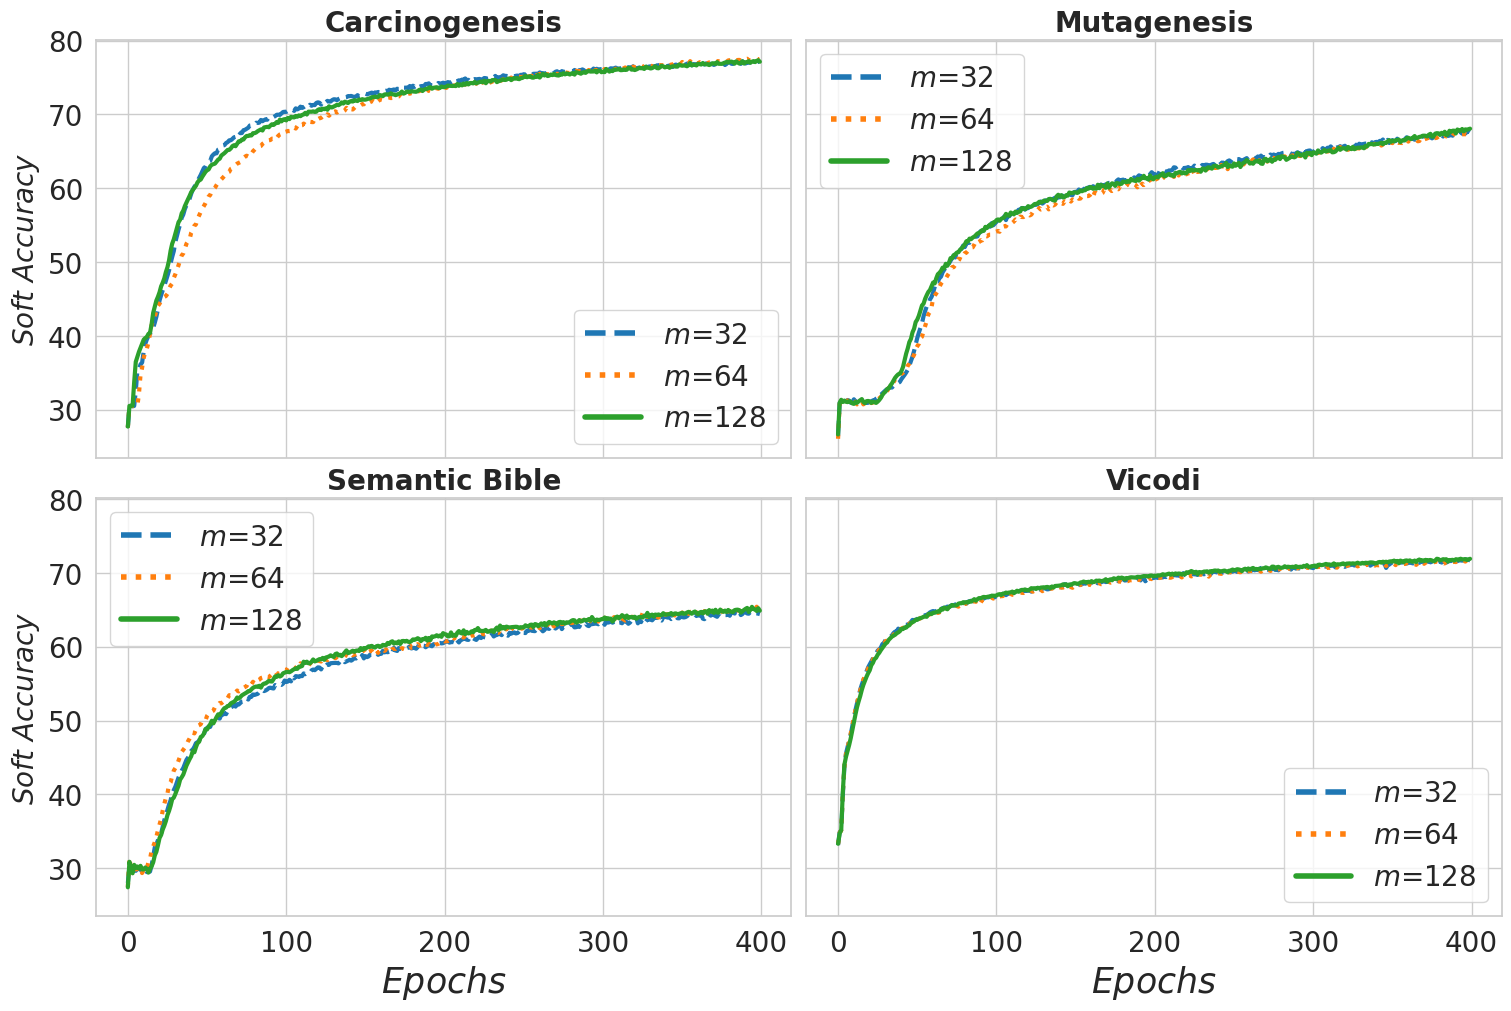

In [6]:
names = ['Carcinogenesis', 'Mutagenesis', 'Semantic Bible', 'Vicodi']
plot_acc_curves(plot_data, names, mode='soft')

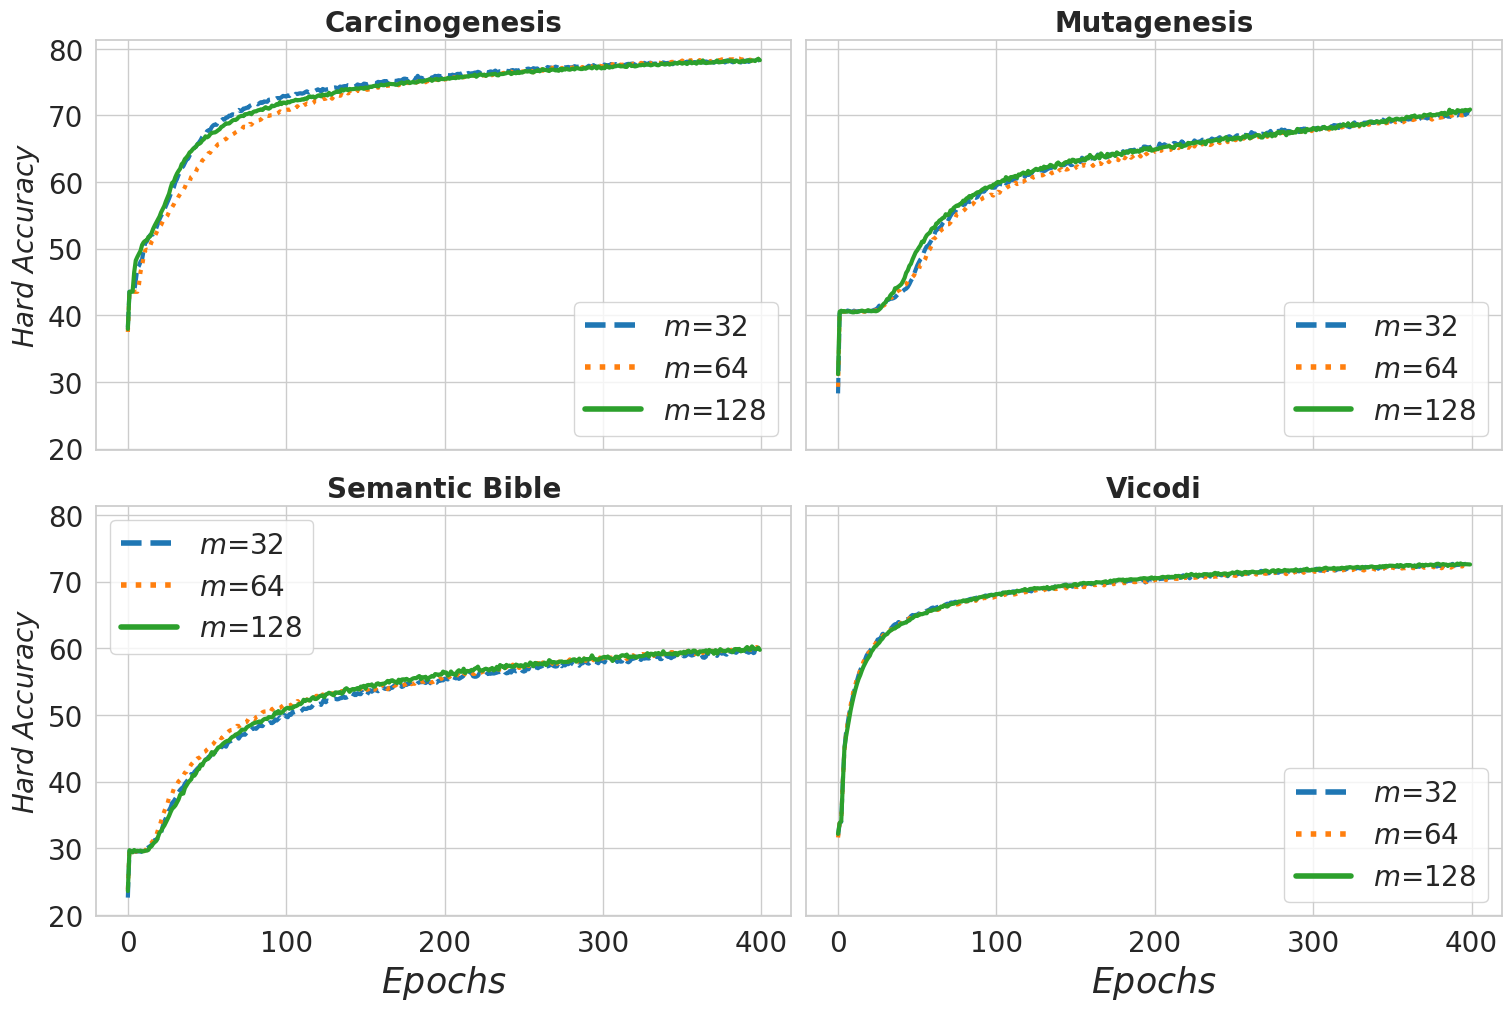

In [7]:
plot_acc_curves(plot_data, names, mode='hard')

In [8]:
def plot_loss_curves(loss_data, names, emb_model='ConEx'):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import seaborn as sns
    sns.set_theme(style="whitegrid")
    Markers = ['--', ':', '-']
    Colors = ['tab:blue', 'tab:orange', 'tab:green']
    
    fig, axs = plt.subplots(2, 2, figsize=(15,10), sharey=True, constrained_layout=True)
    legend = ('$m$=32', '$m$=64', '$m$=128')
    for ax, name, data in zip(axs.flat, names, loss_data):
        i = 0
        for crv in data['loss']:
            mk = Markers[i]
            c = Colors[i]
            ax.plot(crv, mk, markersize=3, linewidth=3, color=c)
            i += 1
        leg = ax.legend(legend, prop={'size': 20})
        for line in leg.get_lines():
            line.set_linewidth(4.0)
        ax.set_title(name, fontsize=20, fontweight="bold")
        ax.set_xlabel('$Epochs$', fontsize=25)
        ax.set_ylabel('$Loss$', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)

    for ax in fig.get_axes():
        ax.label_outer()
    fig.savefig(f'loss-curves-all-KBs_{emb_model}.pdf', bbox_inches='tight')
    fig.show()

In [9]:
loss_data = [{'loss': []}, {'loss': []}, {'loss': []}, {'loss': []}]
for i, kb in enumerate(['carcinogenesis', 'mutagenesis', 'semantic_bible', 'vicodi']):
    for model in ["SetTransformer_inducing_points32", "SetTransformer_inducing_points64", "SetTransformer_inducing_points128"]:
        with open(f'datasets/{kb}/Plot_data/{emb_model}_{model}.json') as file:
            data = json.load(file)
            loss_data[i]['loss'].append(data['tr loss'])

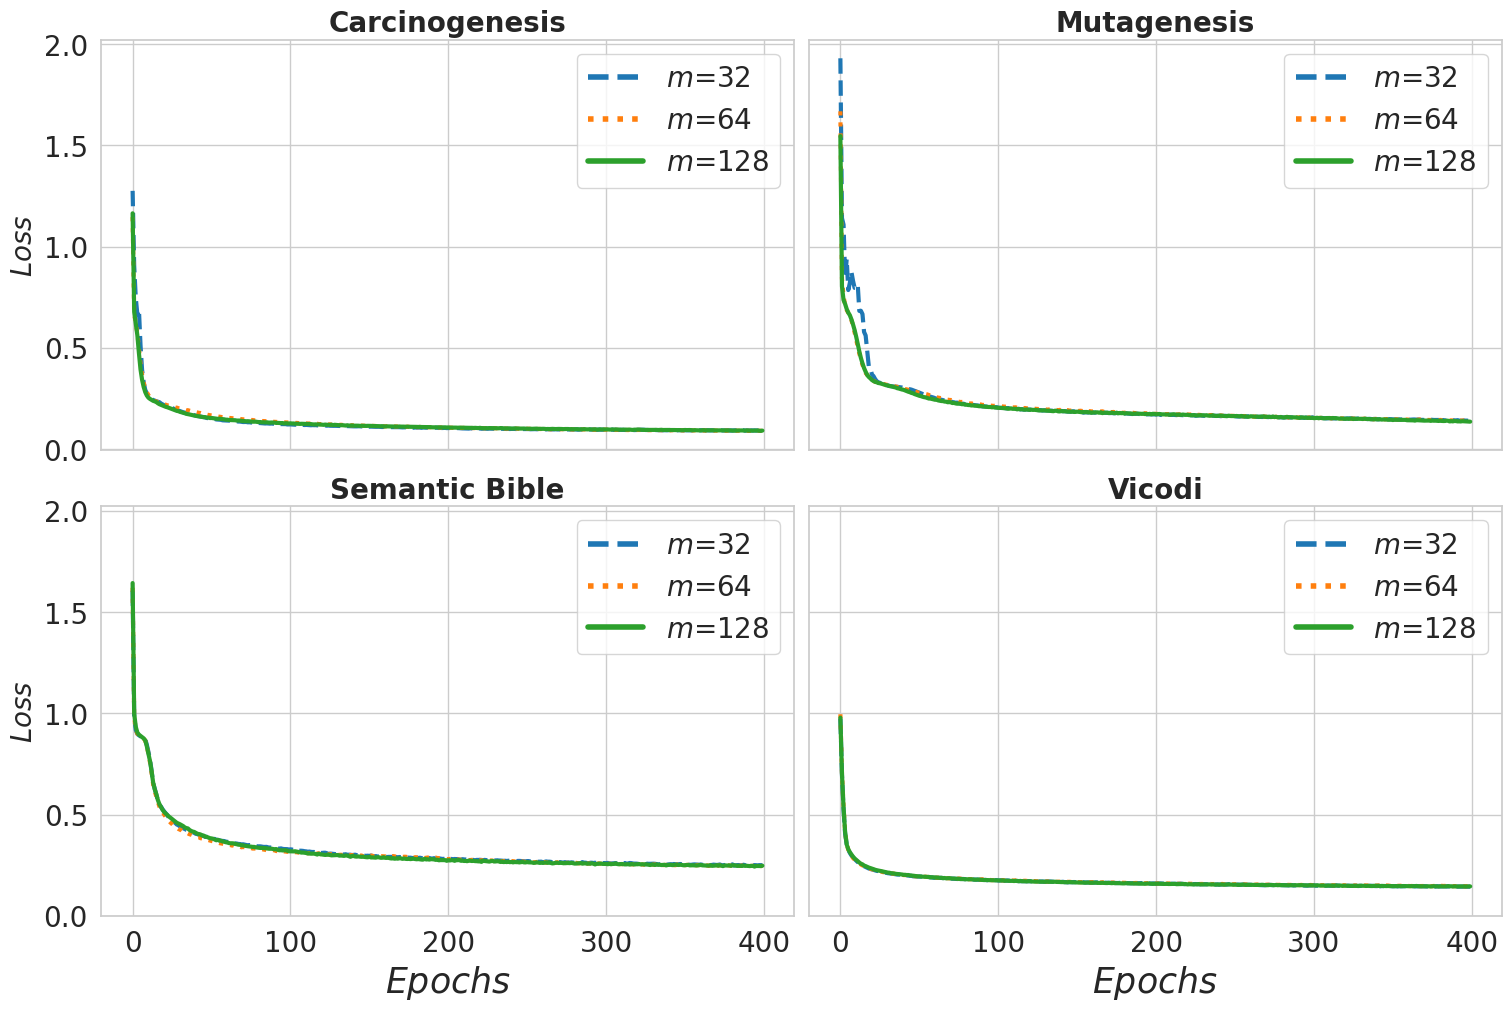

In [10]:
names = ['Carcinogenesis', 'Mutagenesis', 'Semantic Bible', 'Vicodi']
plot_loss_curves(loss_data, names, emb_model='ConEx')

### Incremental prediction results

In [11]:
#from IPython.display import display, Math, Latex
#%%latex
#Latex('$R_\mathcal{U}$')
import json

In [11]:
def plot_incremental_input_results(data, names, x_values, metric):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import seaborn as sns
    #sns.set_theme(style="whitegrid")
    Markers = ['s', 'o', 'p', 'D', 'P']
    Colors = ['tab:red', 'tab:orange', 'tab:purple', 'tab:green', 'tab:blue']
    fig, axs = plt.subplots(2, 2, figsize=(15,10), sharey=True, constrained_layout=True)
    legend = ('CELOE', 'EvoLearner', 'NCES2', 'ROCES', 'ROCES$_{U}$')
    for ax, name, sub_data in zip(axs.flat, names, data):
        i = 0
        for crv in sub_data:
            mk = Markers[i]
            c = Colors[i]
            ax.plot(list(map(str, x_values)), crv, mk, markersize=10, color=c, linestyle='--', linewidth=3)
            i += 1
        leg = ax.legend(legend, prop={'size': 20})
        for line in leg.get_lines():
            line.set_linewidth(4.0)
        rename = name.capitalize() if not "_" in name else " ".join([n.capitalize() for n in name.split("_")])
        ax.set_title(rename, fontsize=20, fontweight="bold")
        ax.set_xlabel('Number of examples', fontsize=25)
        rename_metric = metric if not 'time' in metric else "Runtime (sec.)"
        ax.set_ylabel(rename_metric, fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)
    for ax in fig.get_axes():
        ax.label_outer()
    #fig.savefig(f'incremental_input_{metric.replace("$", "").lower()}.pdf', bbox_inches='tight')
    fig.show()

In [7]:
incremental_input_f1 = []
with open("datasets/ROCES_ConEx_incremental.json") as file:
    roces_results = json.load(file)
with open("datasets/ROCES_ConEx_uniform_incremental.json") as file:
    roces_u_results = json.load(file)
with open("datasets/NCES2_ConEx_incremental.json") as file:
    nces2_results = json.load(file)
for kb in ["carcinogenesis", "mutagenesis", "semantic_bible", "vicodi"]:
    with open(f"datasets/CELOE_{kb}_incremental.json") as file:
        celoe_results = json.load(file)
    with open(f"datasets/EvoLearner_{kb}_incremental.json") as file:
        evo_results = json.load(file)
    f1_per_kb = [celoe_results[f'{kb}']['f1'], evo_results[f'{kb}']['f1'],
                nces2_results[f'{kb}']['f1'], roces_results[f'{kb}']['f1'], roces_u_results[f'{kb}']['f1']]
    incremental_input_f1.append(f1_per_kb)

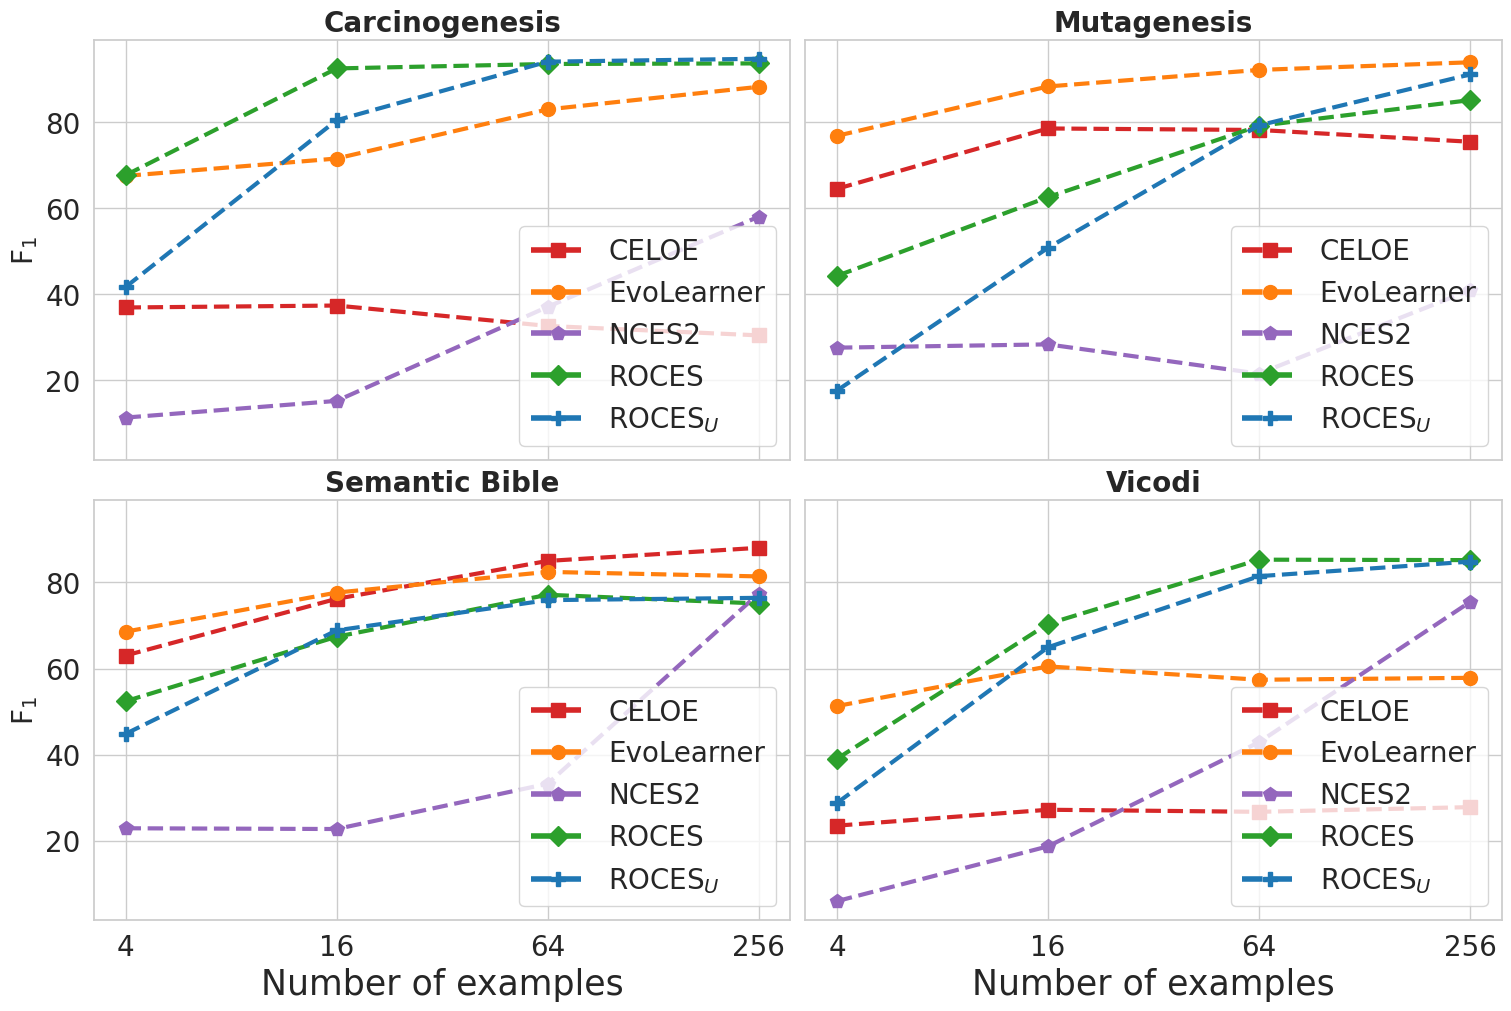

In [14]:
plot_incremental_input_results(incremental_input_f1, ["carcinogenesis", "mutagenesis", "semantic_bible", "vicodi"], x_values=roces_results['carcinogenesis']['examples sizes'], metric='F$_1$')

In [9]:
incremental_input_runtime = []
with open("datasets/ROCES_ConEx_incremental.json") as file:
    roces_results = json.load(file)
with open("datasets/ROCES_ConEx_uniform_incremental.json") as file:
    roces_u_results = json.load(file)
with open("datasets/NCES2_ConEx_incremental.json") as file:
    nces2_results = json.load(file)
for kb in ["carcinogenesis", "mutagenesis", "semantic_bible", "vicodi"]:
    with open(f"datasets/CELOE_{kb}_incremental.json") as file:
        celoe_results = json.load(file)
    with open(f"datasets/EvoLearner_{kb}_incremental.json") as file:
        evo_results = json.load(file)
    runtime_per_kb = [celoe_results[f'{kb}']['runtime'], evo_results[f'{kb}']['runtime'],
                nces2_results[f'{kb}']['runtime'], roces_results[f'{kb}']['runtime'], roces_u_results[f'{kb}']['runtime']]
    incremental_input_runtime.append(runtime_per_kb) 

In [12]:
plot_incremental_input_results(incremental_input_runtime, ["carcinogenesis", "mutagenesis", "semantic_bible", "vicodi"], x_values=roces_results['carcinogenesis']['examples sizes'], metric='Runtime')